In [1]:
import pandas as pd

# Load CSV file
df = pd.read_csv("techzone_sales_data.csv")

# Preview
print(df.head())


         Date Order_ID Product_Category       Product_Name  Unit_Price  \
0  2024-04-13   ORD001      Accessories      Laptop Sleeve        1200   
1  2024-02-21   ORD002      Accessories  Bluetooth Earbuds        1500   
2  2024-05-09   ORD003      Accessories      Laptop Sleeve        1500   
3  2024-01-13   ORD004      Accessories     Wireless Mouse        1500   
4  2024-01-06   ORD005    Mobile Phones        OnePlus 10R       60000   

   Quantity  Revenue Customer_Region    Payment_Method  
0         3     3600            East               UPI  
1         5     7500            West       Credit Card  
2         5     7500            West  Cash on Delivery  
3         2     3000            East       Credit Card  
4         1    60000           South       Net Banking  


In [2]:
# Check types and missing values
print(df.info())
print(df.isnull().sum())

# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              100 non-null    object
 1   Order_ID          100 non-null    object
 2   Product_Category  100 non-null    object
 3   Product_Name      100 non-null    object
 4   Unit_Price        100 non-null    int64 
 5   Quantity          100 non-null    int64 
 6   Revenue           100 non-null    int64 
 7   Customer_Region   100 non-null    object
 8   Payment_Method    100 non-null    object
dtypes: int64(3), object(6)
memory usage: 7.2+ KB
None
Date                0
Order_ID            0
Product_Category    0
Product_Name        0
Unit_Price          0
Quantity            0
Revenue             0
Customer_Region     0
Payment_Method      0
dtype: int64


C:\Users\mk199\AppData\Local\Temp\ipykernel_10696\187080277.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Revenue', y='Product_Category', data=category_revenue, palette='Blues_d')


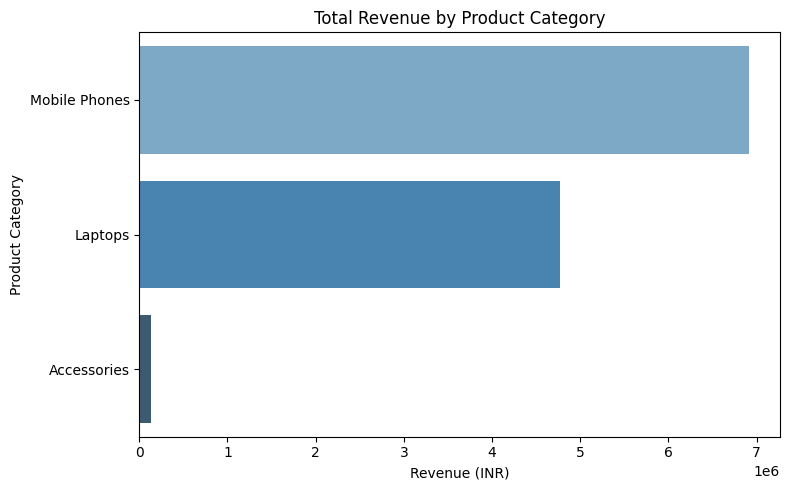

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

category_revenue = df.groupby('Product_Category')['Revenue'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='Revenue', y='Product_Category', data=category_revenue, palette='Blues_d')
plt.title('Total Revenue by Product Category')
plt.xlabel('Revenue (INR)')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()


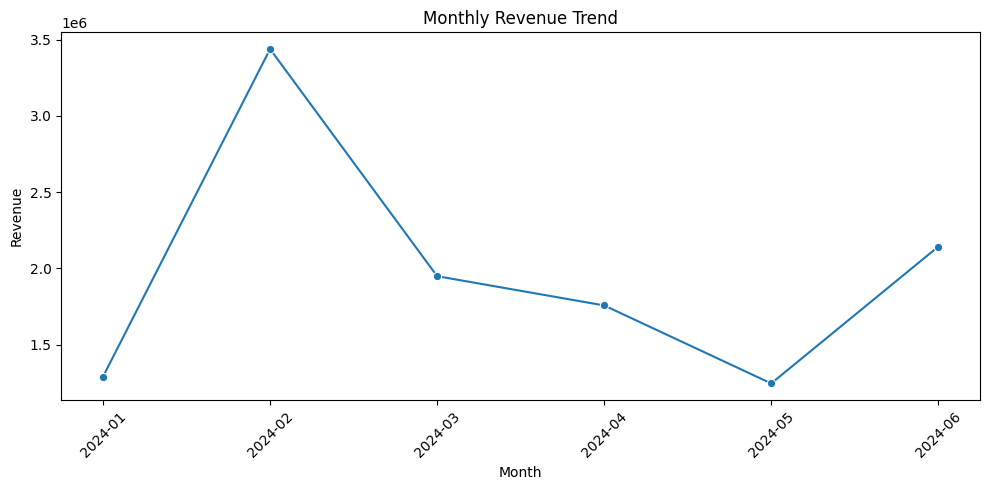

In [4]:
df['Month'] = df['Date'].dt.to_period('M').astype(str)

monthly_revenue = df.groupby('Month')['Revenue'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x='Month', y='Revenue', data=monthly_revenue, marker='o')
plt.title('Monthly Revenue Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\mk199\AppData\Local\Temp\ipykernel_10696\3422495205.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Revenue', y='Customer_Region', data=region_revenue, palette='viridis')


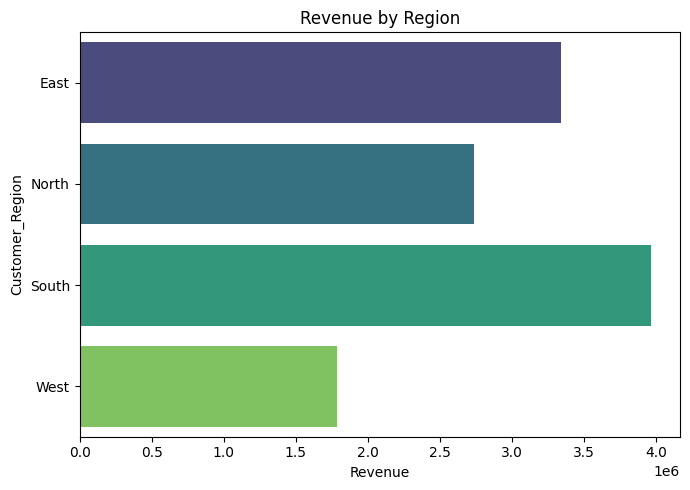

In [5]:
region_revenue = df.groupby('Customer_Region')['Revenue'].sum().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(x='Revenue', y='Customer_Region', data=region_revenue, palette='viridis')
plt.title('Revenue by Region')
plt.tight_layout()
plt.show()


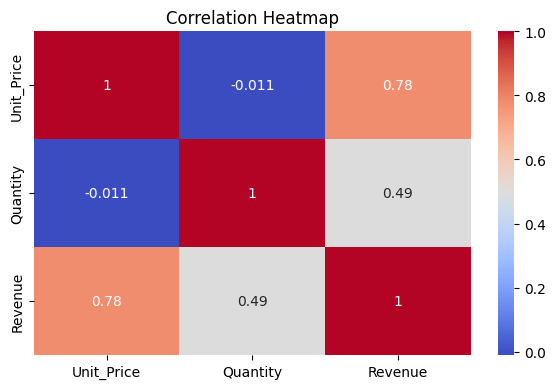

In [6]:
# Select numeric columns
num_cols = df[['Unit_Price', 'Quantity', 'Revenue']]
plt.figure(figsize=(6,4))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()
